<a href="https://colab.research.google.com/github/clap-b/thedarezone-landing-69064/blob/main/Assignements/Part%203/Assignment_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DSML investigation

You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

Your mission, should you choose to accept it, is to find that agent before stealing any classified information. Good luck!

# Assignment part three


We received new intelligence informing us that the rogue agent has a position with great responsibility.
Use the table "HR_Analytics.csv" to create a classifier model that predicts the job role of a person. Use this model to predict the roles of the table of suspects "suspect_HR_data.csv".

Retain only the list of suspects whose role indicates high responsibility.


## Getting to know our data

- BusinessTravel: The frequency of business travel for the employee. (Categorical)
- DailyRate: The daily rate of pay for the employee. (Numerical)
- DistanceFromHome: The distance from home in miles for the employee. (Numerical)
- Education: The level of education achieved by the employee. (Categorical)
- EmployeeCount: The total number of employees in the organization. (Numerical)
- EmployeeNumber: A unique identifier for each employee profile. (Numerical)
- EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)
- Gender: The gender of the employee. (Categorical)
- HourlyRate: The hourly rate of pay for the employee. (Numerical)
- JobInvolvement: The level of involvement required for the employee's job. (Categorical)
- JobLevel: The job level of the employee. (Categorical)
- JobSatisfaction: The employee's satisfaction with their job. (Categorical)
- MonthlyIncome: The monthly income of the employee. (Numerical)
- MonthlyRate: The monthly rate of pay for the employee. (Numerical)
- NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)
- Over18: Whether or not the employee is over 18. (Categorical)
- OverTime: Whether or not the employee works overtime. (Categorical)
- PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)
- PerformanceRating: The performance rating of the employee. (Categorical)
- RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)
- StandardHours: The standard hours of work for the employee. (Numerical)
- StockOptionLevel: The stock option level of the employee. (Numerical)
- TotalWorkingYears: The total number of years the employee has worked. (Numerical)
- TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)
- WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)
- YearsAtCompany: The number of years the employee has been with the company. (Numerical)
- YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)
- YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)
- YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

In [2]:
# Import required packages
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Assignements/Part%203/data/HR_Analytics.csv", index_col='Unnamed: 0')
suspects = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Assignements/Part%203/data/suspects.csv", index_col='Unnamed: 0')


## 1. Check the data

Display the first rows of the datasets at hand. Display the list of columns they have.

In [4]:
# Your code here
display(df.head())


,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,1102,1,2,1,1,2,Female,94,3,...,1,80,0,8,0,1,6,4,0,5
1,Travel_Frequently,279,8,1,1,2,3,Male,61,2,...,4,80,1,10,3,3,10,7,1,7
2,Travel_Rarely,1373,2,2,1,4,4,Male,92,2,...,2,80,0,7,3,3,0,0,0,0
3,Travel_Frequently,1392,3,4,1,5,4,Female,56,3,...,3,80,0,8,3,3,8,7,3,0
4,Travel_Rarely,591,2,1,1,7,1,Male,40,3,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Same steps for the suspects dataset
# Your code here
display(suspects.head())

,userID,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,317991,Travel_Rarely,1102,1,2,1,1,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,241892,Travel_Frequently,279,8,1,1,2,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,303376,Travel_Rarely,1373,2,2,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,761992,Travel_Frequently,1392,3,4,1,5,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,373318,Travel_Rarely,591,2,1,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,2


## 2. Encode categorical variable

Before we can use categorical data in our logistic regression model, these values must be encoded. To determine the most appropriate type of encoding, it's essential to first understand the unique entries in each categorical column.

Retrieve and review the unique values for the following columns: `BusinessTravel`, `Gender`, and `OverTime`. This will guide our choice of encoding method.

*Hint: A unique value in a column represents a distinct category.*

In [6]:
#Your code here
print(df['BusinessTravel'].unique())
print(df['Gender'].unique())
print(df['OverTime'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Female' 'Male']
['Yes' 'No']


**Q1. Which of the following values are included in the unique values of the "BusinessTravel" column?**

### 2.1 Encode df dataframe

Consider the dataset HR_analytics which is loaded in the dataframe `df`. We will train our models on this data.


*Hint: The general idea is to create a new dataset that will contain the new encoded columns and get rid of the original columns `BusinessTravel`, `OverTime` and `Gender`.*

Let's start by encoding our 3 categorical variables:

* Label Encoding: `BusinessTravel`.
* One-Hot Encoding: `Gender`, `OverTime`

*Note: To clearly distinguish your newly encoded columns, especially for label encoding, consider renaming them with a prefix. For example, use `le_BusinessTravel` for the label-encoded `BusinessTravel` column.*


In [17]:
# Your code here
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['le_BusinessTravel'] = le.fit_transform(df_encoded['BusinessTravel'])
one_hot = OneHotEncoder().fit(df[['Gender', 'OverTime']])
one_hot_encoded = one_hot.transform(df[['Gender', 'OverTime']]).toarray()

one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=one_hot.get_feature_names_out())


df_encoded.head()

,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,le_BusinessTravel
0,Travel_Rarely,1102,1,2,1,1,2,Female,94,3,...,80,0,8,0,1,6,4,0,5,2
1,Travel_Frequently,279,8,1,1,2,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,1
2,Travel_Rarely,1373,2,2,1,4,4,Male,92,2,...,80,0,7,3,3,0,0,0,0,2
3,Travel_Frequently,1392,3,4,1,5,4,Female,56,3,...,80,0,8,3,3,8,7,3,0,1
4,Travel_Rarely,591,2,1,1,7,1,Male,40,3,...,80,1,6,3,3,2,2,2,2,2


 After encoding these categorical variable, merge the newly encoded columns back into a new dataframe named `df_encoded`.

This integrated dataframe will then be used for training your model.

In [18]:
# Your code here
df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)
df_encoded.head()

,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,le_BusinessTravel,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,Travel_Rarely,1102,1,2,1,1,2,Female,94,3,...,1,6,4,0,5,2,1.0,0.0,0.0,1.0
1,Travel_Frequently,279,8,1,1,2,3,Male,61,2,...,3,10,7,1,7,1,0.0,1.0,1.0,0.0
2,Travel_Rarely,1373,2,2,1,4,4,Male,92,2,...,3,0,0,0,0,2,0.0,1.0,0.0,1.0
3,Travel_Frequently,1392,3,4,1,5,4,Female,56,3,...,3,8,7,3,0,1,1.0,0.0,0.0,1.0
4,Travel_Rarely,591,2,1,1,7,1,Male,40,3,...,3,2,2,2,2,2,0.0,1.0,1.0,0.0


Ensure you remove the columns `BusinessTravel`, `Gender`, and `OverTime` from your `df_encoded` dataframe, as these contain categorical values.
You can display the few first rows in order to check if your encoding worked correctly.

In [19]:
# Your code here
df_encoded = df_encoded.drop(['BusinessTravel', 'Gender', 'OverTime'], axis=1)
df_encoded.head()

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,le_BusinessTravel,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,1102,1,2,1,1,2,94,3,2,4,...,1,6,4,0,5,2,1.0,0.0,0.0,1.0
1,279,8,1,1,2,3,61,2,2,2,...,3,10,7,1,7,1,0.0,1.0,1.0,0.0
2,1373,2,2,1,4,4,92,2,1,3,...,3,0,0,0,0,2,0.0,1.0,0.0,1.0
3,1392,3,4,1,5,4,56,3,1,3,...,3,8,7,3,0,1,1.0,0.0,0.0,1.0
4,591,2,1,1,7,1,40,3,1,2,...,3,2,2,2,2,2,0.0,1.0,1.0,0.0


Let's count and display the occurrences of each value in the `le_BusinessTravel` column of the `df_encoded` DataFrame.

In [20]:
# Your code here
df_encoded['le_BusinessTravel'].value_counts()

,count
le_BusinessTravel,
2,1043
1,277
0,150


### 2.2. Encode suspects dataset

Proceed with encoding the `suspects` dataset by following the same steps outlined in Section 2.1. Note the key differences for this dataset:

- It lacks the `JobLevel` column, which is our target variable for prediction.
- It includes an additional column, `userID`, which is not present in the first dataset.


*Hint: The general idea is to create a new dataset that will contain the new encoded columns and get rid of the original column BusinessTravel, OverTime and Gender.*

Let's start by encoding our 3 categorical variables:

* Label Encoding: `BusinessTravel`.
* One-Hot Encoding: `Gender`, `OverTime`

In [45]:
# Your code here
suspects_encoded = suspects.copy()
le = LabelEncoder()
suspects_encoded['le_BusinessTravel'] = le.fit_transform(suspects_encoded['BusinessTravel'])
one_hot = OneHotEncoder().fit(suspects[['Gender', 'OverTime']])
one_hot_encoded = one_hot.transform(suspects[['Gender', 'OverTime']]).toarray()

one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=one_hot.get_feature_names_out())
suspects_encoded.head()


,userID,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,le_BusinessTravel
0,317991,Travel_Rarely,1102,1,2,1,1,2,Female,94,...,80,0,8,0,1,6,4,0,5,2
1,241892,Travel_Frequently,279,8,1,1,2,3,Male,61,...,80,1,10,3,3,10,7,1,7,1
2,303376,Travel_Rarely,1373,2,2,1,4,4,Male,92,...,80,0,7,3,3,0,0,0,0,2
3,761992,Travel_Frequently,1392,3,4,1,5,4,Female,56,...,80,0,8,3,3,8,7,3,0,1
4,373318,Travel_Rarely,591,2,1,1,7,1,Male,40,...,80,1,6,3,3,2,2,2,2,2


 After encoding these categorical variable, merge the newly encoded columns with the dataframe `suspects` to create a new dataframe named `suspects_encoded`.

This new dataframe will then be used for the prediction at the end of the notebook.

In [46]:
# Your code here

suspects_encoded = pd.concat([suspects_encoded, one_hot_encoded], axis=1)
suspects_encoded.head()

,userID,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,le_BusinessTravel,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,317991,Travel_Rarely,1102,1,2,1,1,2,Female,94,...,1,6,4,0,5,2,1.0,0.0,0.0,1.0
1,241892,Travel_Frequently,279,8,1,1,2,3,Male,61,...,3,10,7,1,7,1,0.0,1.0,1.0,0.0
2,303376,Travel_Rarely,1373,2,2,1,4,4,Male,92,...,3,0,0,0,0,2,0.0,1.0,0.0,1.0
3,761992,Travel_Frequently,1392,3,4,1,5,4,Female,56,...,3,8,7,3,0,1,1.0,0.0,0.0,1.0
4,373318,Travel_Rarely,591,2,1,1,7,1,Male,40,...,3,2,2,2,2,2,0.0,1.0,1.0,0.0


Ensure you remove the columns `BusinessTravel`, `Gender`, and `OverTime` from your encoded dataset, as these contain categorical values.

Also remove the `userID` columns as it's the independant variable.

You can display the few first rows in order to check if your encoding worked correctly.

In [47]:
# Your code here
df_encoded.columns
suspects_encoded = suspects_encoded.drop(['BusinessTravel', 'Gender', 'OverTime', 'userID'], axis=1)
suspects_encoded.head()


,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,le_BusinessTravel,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,1102,1,2,1,1,2,94,3,4,5993,...,1,6,4,0,5,2,1.0,0.0,0.0,1.0
1,279,8,1,1,2,3,61,2,2,5130,...,3,10,7,1,7,1,0.0,1.0,1.0,0.0
2,1373,2,2,1,4,4,92,2,3,2090,...,3,0,0,0,0,2,0.0,1.0,0.0,1.0
3,1392,3,4,1,5,4,56,3,3,2909,...,3,8,7,3,0,1,1.0,0.0,0.0,1.0
4,591,2,1,1,7,1,40,3,2,3468,...,3,2,2,2,2,2,0.0,1.0,1.0,0.0


**Q2. How many columns does `suspects_encoded`dataframe contains after the whole encoding process?**

## 3. Split and rescale

To ensure our model generalizes well to new data and to mitigate overfitting, it is essential to partition the dataframe `df_encoded` into training and testing subsets.
* Define your dependent variable y `JobLevel` and your independent features X;
* Set random seed to 123;
* Set test size to 20% and train size to 80%;
* Split your dataset into test and train set;
* Rescale the features using `MinMaxScaler()`

In [52]:
# Your code here

X = df_encoded.drop('JobLevel', axis=1)
y = df_encoded['JobLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## 4. Logistic regression


In this section we will use logistic regression to predict the `JobLevel` of the potential suspects in the training dataframe `df_encoded`.

Begin by training a logistic regression model with the `max_iter` parameter set to 1000 and `random_state` to 123. Fit the model on the training data.

In [53]:
# Your code here
model = LogisticRegression(max_iter=1000, random_state=123)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=123)

Then, evaluate the model's accuracy on the test set.



In [54]:
# Your code here
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7414965986394558


## 5. Evaluate your model

### 5.1 Classification Report

To gain more insight into the quality of our model, generate and print the classification report using the test set.

In [55]:
# Your code here
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.95      0.85        93
           2       0.75      0.77      0.76       112
           3       0.68      0.49      0.57        47
           4       0.63      0.44      0.52        27
           5       0.64      0.60      0.62        15

    accuracy                           0.74       294
   macro avg       0.70      0.65      0.67       294
weighted avg       0.73      0.74      0.73       294



**Q3. According to the classification report, which job level does the logistic regression model struggle the most to classify accurately?**

*Hint: Precision might not be the only value to take into consideration*

### 5.2 Confusion Matrix

Print a heatmap of a confusion matrix.

*Note: The code below adjusts the category numeration to start from '1' instead of the default '0'. Make sure to replace the placeholders with your actual variables before plotting the confusion matrix.*

*Code Reuse Guidance: Ensure that you use the correct variables when adapting the provided code snippet to generate and display the heatmap of your confusion matrix.*

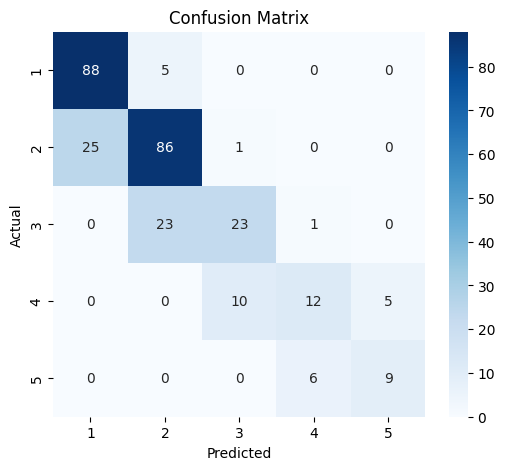

In [60]:
# Plot confusion matrix as heatmap
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Adjust the confusion matrix for 1-based indexing if necessary
if np.min(y_test) == 0:  # Check if the smallest label is 0
    cm = np.roll(cm, shift=1, axis=0)
    cm = np.roll(cm, shift=1, axis=1)

# Your code here
labels = sorted(y.unique())  # e.g. [1, 2, 3, 4, 5]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Q4. Based on the confusion matrix, what is the total number of false positives for the label '3'?**

Your answer should be an integer (e.g. 8).

### 5.3 Default Rate

To assess whether our classification model outperforms a naive classifier, we need to calculate the default rate.

*Note: The default rate is the proportion of the most common class's occurrences relative to the total number of entries.*

 Calculate the default rate using the entire dataset to determine this proportion.

In [63]:
# Your code here
default_rate = y.value_counts(normalize=True).max()
print(f"Default Rate: {default_rate:.2%}")

Default Rate: 36.94%


**Q5. What is the default rate ?**
Default rate as a percentage. Round to 2 decimal digits (e.g. 30.12)

**Q6. Look at the default rate you have calculated. Does your logistic regression perform better than a naive algorithm would?**

## 6. Trying a different type of classification algorithm

Exploring different classification algorithms can provide insights into model performance variations. For this task, we will use the RandomForestClassifier. Follow these steps to implement this approach:

- Train your classification algorithm using `RandomForestClassifier()`;
- Set `max_depth` to 5 and the random state to a random seed (123);
- Do not specify any other parameters;
- Evaluate your model by displaying both the training and the test accuracy.

*Note: You can reuse the splited and encoded dataframe from Section 3.*

In [64]:
# Your code here
# Train your classification algorithm

# Instantiate the Random Forest Classifier with a maximum depth of 5
rf_model = RandomForestClassifier(max_depth=5, random_state=123)

# Train the Random Forest Classifier
rf_model.fit(X_train, y_train)

# Evaluate the model's performance on the training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate the model's performance on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.93
Test Accuracy: 0.85


Dispay the classification report and the confusion matrix.

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        93
           2       0.80      0.90      0.85       112
           3       0.82      0.66      0.73        47
           4       0.92      0.81      0.86        27
           5       1.00      0.53      0.70        15

    accuracy                           0.85       294
   macro avg       0.89      0.77      0.81       294
weighted avg       0.86      0.85      0.85       294



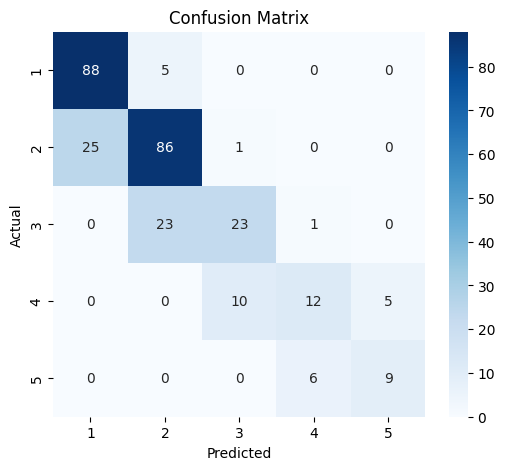

In [68]:
# Your code here
print(classification_report(y_test, y_test_pred))


labels = sorted(y.unique())  # e.g. [1, 2, 3, 4, 5]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Q7. Does the Random Forest Classifier performs better than a logistic regression in terms of accuracy?**

## 7. Decision tree
To compare the effectiveness of different models, we will now utilize a Decision Tree approach. This method can help visualize decision points and understand how features contribute to outcomes. Proceed with the following steps using the DecisionTreeClassifier:

- Train your classification algorithm using `DecisionTreeClassifier()`;
- Set `max_depth` to 5 and the `random_state` to `random_seed` (123);
- Do not specify any other parameters;
- Evaluate your model by displaying both the training and the test accuracy.

*Note: You can reuse the splited and encoded dataframe from Section 3.*

In [70]:
# Your code here
# Instantiate the Decision Tree Classifier with a maximum depth of 5
dt_model = DecisionTreeClassifier(max_depth=5, random_state=123)
# Train the Decision Tree Classifier
dt_model.fit(X_train, y_train)

# Evaluate the model's performance on the training set
y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
# Evaluate the model's performance on the test set
y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.95
Test Accuracy: 0.91


Dispay classification report and confusion matrix.

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.92      0.91        93
           2       0.91      0.86      0.88       112
           3       0.87      0.96      0.91        47
           4       1.00      0.93      0.96        27
           5       1.00      1.00      1.00        15

    accuracy                           0.91       294
   macro avg       0.93      0.93      0.93       294
weighted avg       0.91      0.91      0.91       294



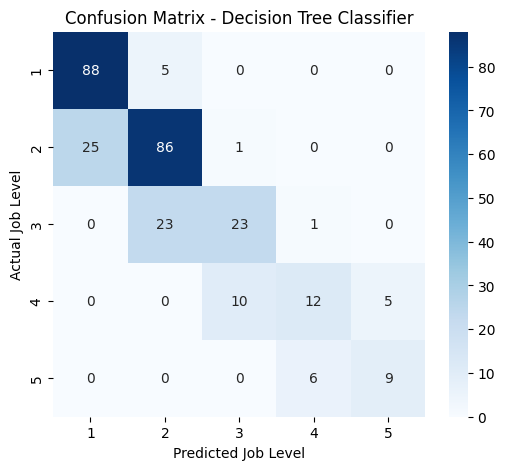

In [73]:
# Your code here
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

labels = sorted(y.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted Job Level")
plt.ylabel("Actual Job Level")
plt.show()

**Q8. According to the confusion matrix of the Decision Tree Classifier, how many suspects were predicted to have a JobLevel of 2?**

**Q9. Is the Decision Tree classifier less accurate than the Random Forest Classifier?**

## 8. k-Nearest Neighbors (kNN)

To explore the impact of different modeling techniques on predictive accuracy, we will experiment with the k-Nearest Neighbors (kNN) algorithm. This method is widely used for its simplicity and effectiveness in classification tasks. Proceed as follows using the kNN model with default settings:

- Train your classification algorithm using the default settings of `KNeighborsClassifier()`;
- Do not specify any parameters beyond the defaults;
- Evaluate your model by displaying its accuracy.

*Note: You can reuse the splited and encoded dataframe from Section 3.*

In [74]:

# Your code here
# Initialize the kNN classifier
knn_model = KNeighborsClassifier()
# Train the KNN Classifier
knn_model.fit(X_train, y_train)
# Evaluate the model's performance on the training set
y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
# Evaluate the model's performance on the test set
y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.64
Test Accuracy: 0.39


### 8.1 Tuning with hyperparameter

The accuracy from the initial k-Nearest Neighbors (kNN) classifier wasn't as high as expected. Let's refine our model by tuning the 'n_neighbors' hyperparameter.

Hyperparameter tuning is crucial for optimizing model performance. A robust method for this is to use grid search, which systematically tests a range of values to determine the optimal setting. For our kNN classifier, we'll employ the following steps to fine-tune the 'n_neighbors' parameter:

- Utilize `GridSearchCV()` to perform a grid search over a range of possible values for 'n_neighbors', from 1 to 15. This range helps in identifying the best value for 'k'.
- Set the cross-validation (`cv`) parameter to 5 folds to ensure each configuration is adequately tested.
- Configure `GridSearchCV()` with the parameters: `scoring='accuracy'`, `return_train_score=False`, and `verbose=1` to monitor the search process.

*Note: You can reuse the splited and encoded dataset from Section 3.*

Set up the kNN classifier and GridSearchCV with a defined range of 'n_neighbors'. Use cross-validation to evaluate each configuration.

In [76]:
# Your code here

# kNN (assumes X_train/X_test are already scaled from Section 3)
knn = KNeighborsClassifier()

# Grid: k from 1 to 15
param_grid = {"n_neighbors": list(range(1, 16))}

# Grid search with 5-fold CV
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    return_train_score=False,
    verbose=1
)



Perform the grid search to find the optimal 'n_neighbors' value and train the kNN classifier using this best parameter.

In [77]:
# Your code here
# Fit the grid search to the data
grid.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy', verbose=1)

 Display the best 'n_neighbors' and assess the trained model's accuracy on both the training and test datasets.

In [78]:
# Your code here
print("Best k:", grid.best_params_["n_neighbors"])
print(f"Best CV accuracy: {grid.best_score_:.3f}")

y_test_pred = grid.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy (k={grid.best_params_['n_neighbors']}): {test_acc:.3f}")


Best k: 10
Best CV accuracy: 0.474
Test accuracy (k=10): 0.432


**Q10. What is the best value of n_neighbor according to the grid search ?**


Evaluate and compare the performance across a range of 'k' values to determine how the number of neighbors influences accuracy.

In [ ]:
# Your code here

**Q11. Is kNN classifier the most accurate algorithm among all the explored models?**

## 9. Remaining suspects

In this section, we will employ the Decision Tree Classifier, as it has proven to be the most accurate among all models evaluated.

We will use this model, which you'll train again on the entire `df_encoded` dataframe, to predict potential suspects within the `suspects_encoded` dataframe.

Your objective is to generate a table displaying `UserID` alongside their corresponding predicted job levels. We will particularly focus on identifying suspects in significant positions, though not at the highest level. This will help narrow down our list of suspects based on the updated intelligence data.


Initialize and fit the Decision Tree Classifier model on the scaled full dataframe `df_encode`. Then, use this model to predict job levels for the encoded suspects dataframe `suspects_encoded`. Append these predictions as a new column `JobLevelDT` in the suspects dataframe.

In [ ]:
# Your code here


Finally, display a list of `UserID` whose predicted job level is exactly 4, indicating they hold high-ranking positions but are not at the chief level. This filtering aligns with our profiling criteria that suspects are likely to be in significant roles.

Show both the list of these UserIDs and the count of such suspects to wrap up our analysis.

In [ ]:
# Your code here

**Q12. Based on your Decision Tree model’s predictions, which of the following userIDs belong to suspects with a job level of 4?**

## Your investigation is progressing effectively, and the list of suspects is narrowing down.

**Don't forget to answer the quiz and submit your code on Moodle before the end of the deadline.**